In [57]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/images.jpeg', 0)

(h, w) = image.shape

print("width: {} pixels".format(w))
print("height: {}  pixels".format(h))
print("Image: {}".format(type(image)))

width: 178 pixels
height: 178  pixels
Image: <class 'numpy.ndarray'>


In [58]:
def encontra_numeros_frequentes(matriz, bits):
    contagem = {}
    # percorre cada elemento da matriz e atualiza a contagem para cada número encontrado
    for linha in matriz:
        for num in linha:
            if num in contagem:
                contagem[num] += 1
            else:
                contagem[num] = 1
   
    resultados = sorted(contagem.items(), key=lambda x: x[1], reverse=True) # classifica os resultados pela contagem de ocorrências em ordem decrescente
    return [resultado[0] for resultado in resultados[:2**bits]] # retorna a quantidade elevado ao bit


# Neste primeiro método eu procuro os valores dos pixel mais frequentes.
# Em seguida, percorro cada pix da imagem e procuro na minha lista de frequentes o valor mais próximo dele, então o substituo
def quantizar(matrix, frequentes):
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      indice = np.abs(frequentes - matrix[i, j]).argmin() # Encontrando o valor mais próximo no array
      valor_proximo = frequentes[indice]
      matrix[i, j] = valor_proximo



# Neste segundo método, eu já levo em consideração os vizinhos (D4).
# Para cada pixel na matrix, eu calculo a soma dos valores 
# adjacentes ao pixel e conto e quantidade de pixels adjacentes que estão sendo levado em consideração para tirar a média
def quantizar2(matrix, frequentes):
  for i in range(matrix.shape[0]):
      for j in range(matrix.shape[1]):
          soma = 0
          count = 0
          # A soma dos valores dos pixels adjacentes é calculada e o contador count é usado para 
          # contar o número de pixels adjacentes considerados. A verificação é feita para garantir 
          # que o pixel adjacente esteja dentro dos limites da matriz.
          for x in range(-1, 2):
              for y in range(-1, 2):
                  if i + x >= 0 and i + x < matrix.shape[0] and j + y >= 0 and j + y < matrix.shape[1]:
                      soma += matrix[i + x, j + y]
                      count += 1
          
          media = soma / count
          idx = np.abs(frequentes - media).argmin()
          nearest_value = frequentes[idx]

          matrix[i, j] = nearest_value

Número de Bits:  5


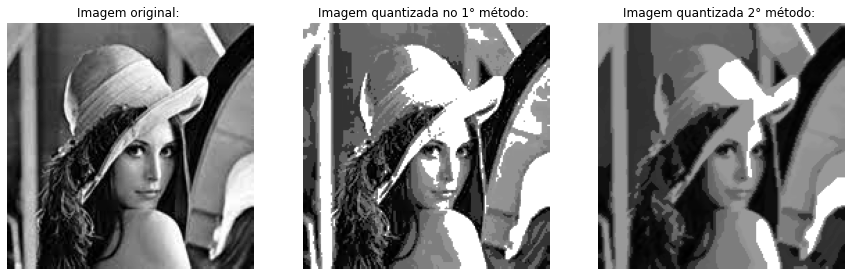

In [59]:
BITS = 5

frequentes = encontra_numeros_frequentes(image, BITS)
frequentes = np.array(frequentes)

new_image_quantizar1 = image.copy()
new_image_quantizar2 = image.copy()

quantizar(new_image_quantizar1, frequentes)
quantizar2(new_image_quantizar2, frequentes)

print("Número de Bits: ", BITS)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Imagem original: ')
axs[0].axis('off')

axs[1].imshow(new_image_quantizar1, cmap='gray')
axs[1].set_title('Imagem quantizada no 1° método: ')
axs[1].axis('off')

axs[2].imshow(new_image_quantizar2, cmap='gray')
axs[2].set_title('Imagem quantizada 2° método: ')
axs[2].axis('off')

# Exibe a figura
plt.show()